#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
np.set_printoptions(3)

In [2]:
FILE_PATH = "data/train.csv"

### Lightweight Data Wrangling

In [3]:
data = pd.read_csv(FILE_PATH).iloc[:, 1:]  # removing the first Id column

### Dimensions

In [4]:
len(data.columns), len(data)

(80, 1460)

### Response to predict

(array([ 34900., 129975., 163000., 214000., 755000.]), 0)

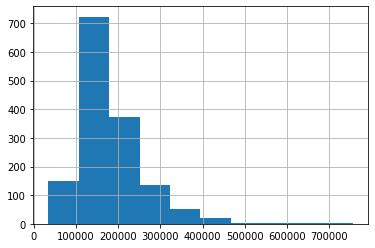

In [5]:
y_vec = data['SalePrice'].values
plt.hist(y_vec)
plt.grid()
np.quantile(y_vec, [0.0, 0.25, 0.5, 0.75, 1.0]), np.isnan(y_vec).sum()

12.105816833620844

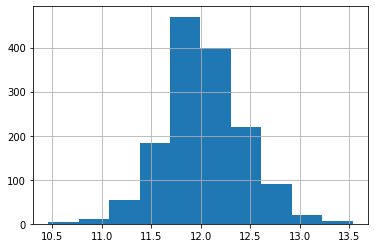

In [6]:
plt.hist(np.log(y_vec))
plt.grid()
np.log(y_vec.mean())

12.024050901109383


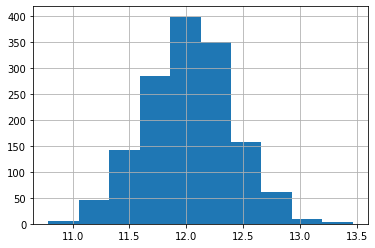

In [7]:
log_y = np.log(y_vec)
mean = log_y.mean()
print(mean)
std = log_y.std()
samples = np.random.randn(len(data))
synthetic = std * samples + mean
plt.hist(synthetic)
plt.grid()

- no pathological values for y
- log transforming the response gives us a nicely normal distribution to predict

### Column types

In [8]:
n_cols = len(data.columns)
numerical_cols = [col for col in data.columns if ('int64' == data.loc[:, col].dtype or 'float64' == data.loc[:, col].dtype)]
len(numerical_cols), numerical_cols

(37,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'])

In [9]:
data.loc[:, numerical_cols].isna().sum(0)

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

MSSubClass embedding
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
0 NaN values removed
MSSubClass log normalized
mean and std
3.7910610563921106 0.7044650845639633
quantiles
[2.996 2.996 3.912 4.248 5.247]


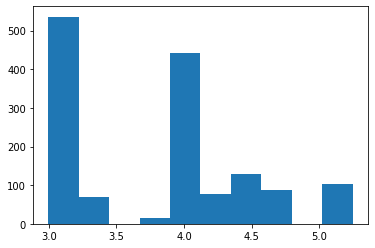

259 NaN values removed
LotFrontage log normalized
mean and std
4.191048610265486 0.35267148952733973
quantiles
[3.045 4.078 4.234 4.382 5.746]


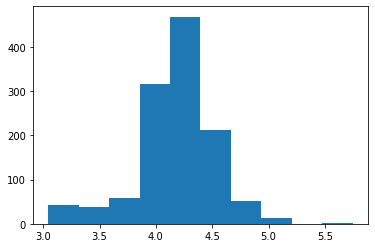

0 NaN values removed
LotArea log normalized
mean and std
9.110838239505547 0.517270829682278
quantiles
[ 7.17   8.93   9.157  9.359 12.28 ]


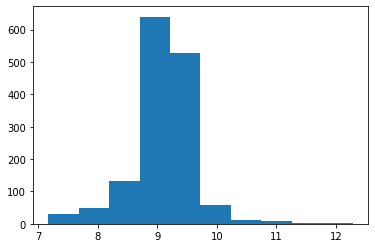

OverallQual embedding
[ 1  2  3  4  5  6  7  8  9 10]
0 NaN values removed
OverallQual log normalized
mean and std
1.7807845417690322 0.24127590802611254
quantiles
[0.    1.609 1.792 1.946 2.303]


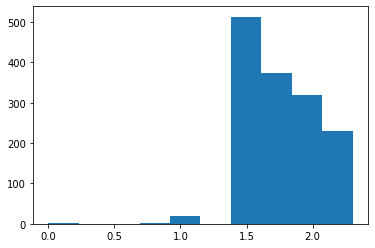

OverallCond embedding
[1 2 3 4 5 6 7 8 9]
0 NaN values removed
OverallCond log normalized
mean and std
1.6984877029560865 0.20215254446167225
quantiles
[0.    1.609 1.609 1.792 2.197]


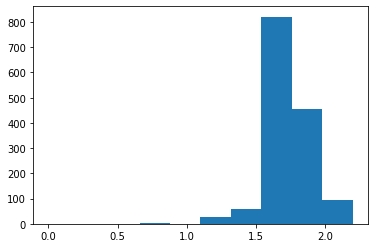

0 NaN values removed
YearBuilt log normalized
mean and std
7.586314107569956 0.015391865872838084
quantiles
[7.535 7.578 7.587 7.601 7.606]


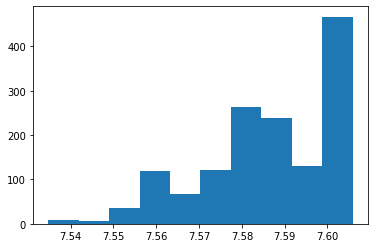

0 NaN values removed
YearRemodAdd log normalized
mean and std
7.5932523090853605 0.010425763086199722
quantiles
[7.576 7.584 7.598 7.603 7.606]


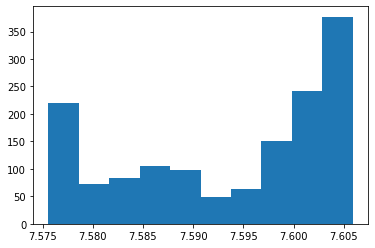

8 NaN values removed
MasVnrArea not normalized
mean and std
103.68526170798899 181.0038452261153
quantiles
[   0.    0.    0.  166. 1600.]


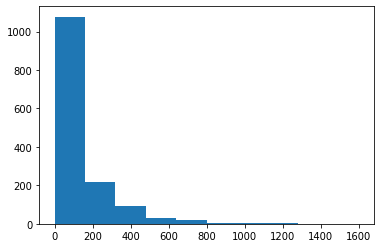

0 NaN values removed
BsmtFinSF1 not normalized
mean and std
443.6397260273973 455.94186610921986
quantiles
[   0.      0.    383.5   712.25 5644.  ]


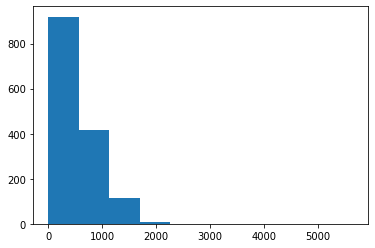

0 NaN values removed
BsmtFinSF2 not normalized
mean and std
46.54931506849315 161.26401701700965
quantiles
[   0.    0.    0.    0. 1474.]


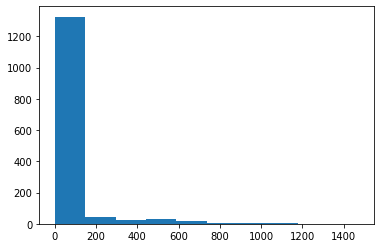

0 NaN values removed
BsmtUnfSF not normalized
mean and std
567.2404109589041 441.71560507210364
quantiles
[   0.   223.   477.5  808.  2336. ]


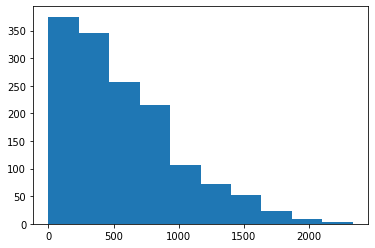

0 NaN values removed
TotalBsmtSF not normalized
mean and std
1057.4294520547944 438.5550571748915
quantiles
[   0.    795.75  991.5  1298.25 6110.  ]


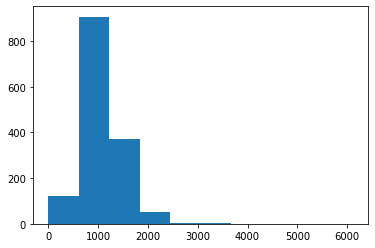

0 NaN values removed
1stFlrSF log normalized
mean and std
7.0075014449454125 0.31762128461879663
quantiles
[5.811 6.782 6.991 7.238 8.454]


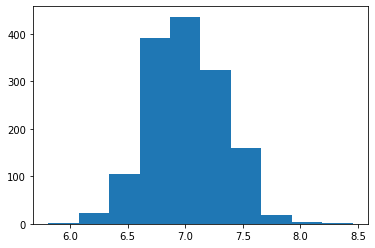

0 NaN values removed
2ndFlrSF not normalized
mean and std
346.99246575342465 436.3789142391623
quantiles
[   0.    0.    0.  728. 2065.]


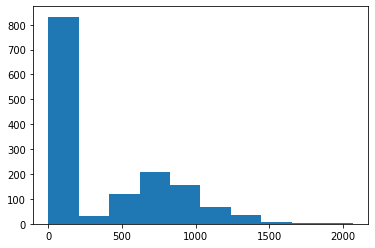

0 NaN values removed
LowQualFinSF not normalized
mean and std
5.844520547945206 48.60642684100095
quantiles
[  0.   0.   0.   0. 572.]


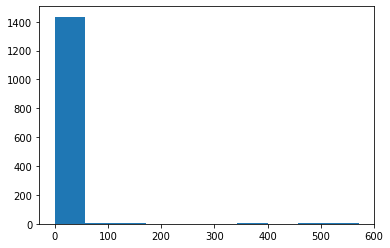

0 NaN values removed
GrLivArea log normalized
mean and std
7.267774383311004 0.3334361751053677
quantiles
[5.811 7.03  7.289 7.483 8.638]


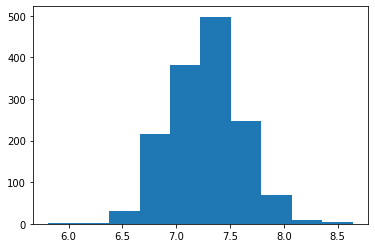

BsmtFullBath embedding
[0 1 2 3]
0 NaN values removed
BsmtFullBath not normalized
mean and std
0.42534246575342466 0.5187328665380639
quantiles
[0. 0. 0. 1. 3.]


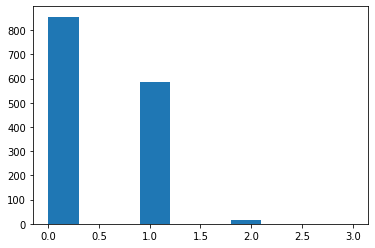

BsmtHalfBath embedding
[0 1 2]
0 NaN values removed
BsmtHalfBath not normalized
mean and std
0.057534246575342465 0.2386708676687363
quantiles
[0. 0. 0. 0. 2.]


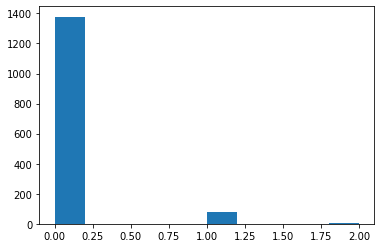

FullBath embedding
[0 1 2 3]
0 NaN values removed
FullBath not normalized
mean and std
1.5650684931506849 0.5507270991829273
quantiles
[0. 1. 2. 2. 3.]


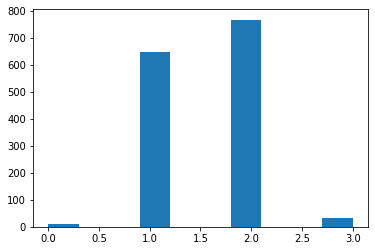

HalfBath embedding
[0 1 2]
0 NaN values removed
HalfBath not normalized
mean and std
0.38287671232876713 0.5027131305719648
quantiles
[0. 0. 0. 1. 2.]


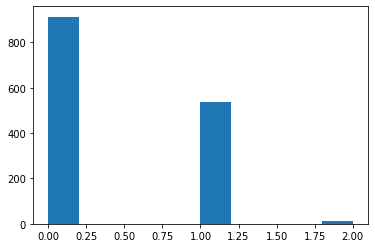

BedroomAbvGr embedding
[0 1 2 3 4 5 6 8]
0 NaN values removed
BedroomAbvGr not normalized
mean and std
2.8664383561643834 0.8154986202469597
quantiles
[0. 2. 3. 3. 8.]


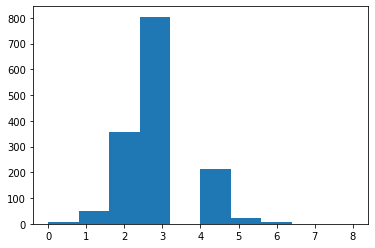

KitchenAbvGr embedding
[0 1 2 3]
0 NaN values removed
KitchenAbvGr not normalized
mean and std
1.0465753424657533 0.22026272717154644
quantiles
[0. 1. 1. 1. 3.]


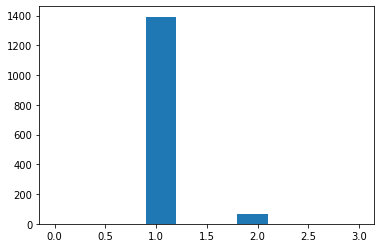

TotRmsAbvGrd embedding
[ 2  3  4  5  6  7  8  9 10 11 12 14]
0 NaN values removed
TotRmsAbvGrd log normalized
mean and std
1.8437885870256994 0.2496784271285176
quantiles
[0.693 1.609 1.792 1.946 2.639]


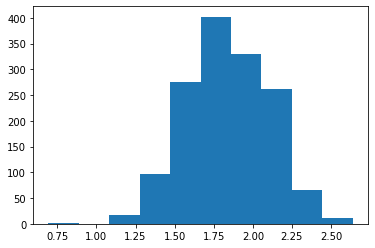

Fireplaces embedding
[0 1 2 3]
0 NaN values removed
Fireplaces not normalized
mean and std
0.613013698630137 0.6444455723354444
quantiles
[0. 0. 1. 1. 3.]


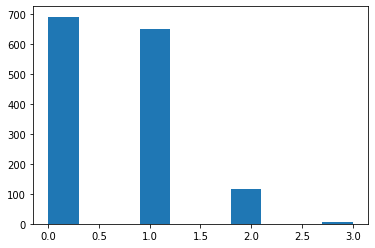

81 NaN values removed
GarageYrBlt log normalized
mean and std
7.590019134707191 0.01252690397892355
quantiles
[7.55  7.581 7.591 7.602 7.606]


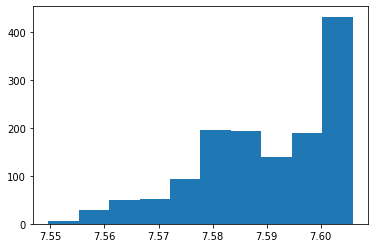

GarageCars embedding
[0 1 2 3 4]
0 NaN values removed
GarageCars not normalized
mean and std
1.7671232876712328 0.7470590364745161
quantiles
[0. 1. 2. 2. 4.]


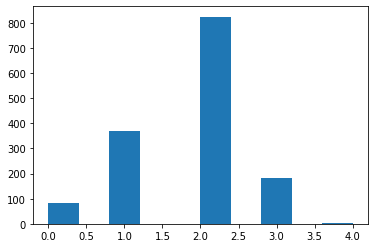

0 NaN values removed
GarageArea not normalized
mean and std
472.9801369863014 213.73160807515626
quantiles
[   0.   334.5  480.   576.  1418. ]


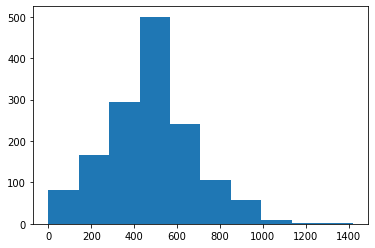

0 NaN values removed
WoodDeckSF not normalized
mean and std
94.2445205479452 125.29586275452299
quantiles
[  0.   0.   0. 168. 857.]


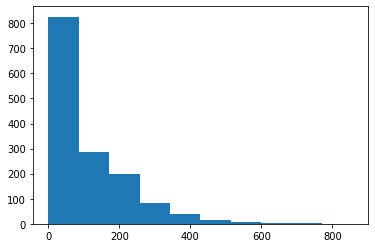

0 NaN values removed
OpenPorchSF not normalized
mean and std
46.66027397260274 66.23333336953536
quantiles
[  0.   0.  25.  68. 547.]


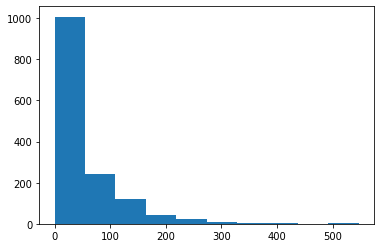

0 NaN values removed
EnclosedPorch not normalized
mean and std
21.954109589041096 61.098213801113864
quantiles
[  0.   0.   0.   0. 552.]


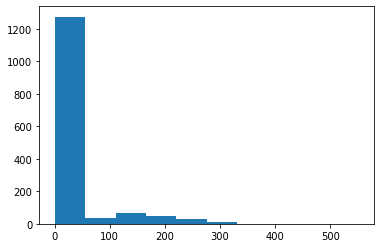

0 NaN values removed
3SsnPorch not normalized
mean and std
3.4095890410958902 29.307288655286133
quantiles
[  0.   0.   0.   0. 508.]


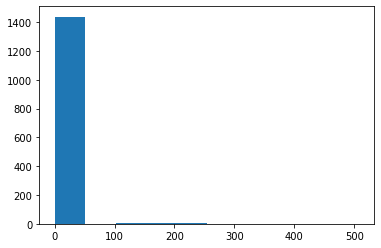

0 NaN values removed
ScreenPorch not normalized
mean and std
15.060958904109588 55.73831700582774
quantiles
[  0.   0.   0.   0. 480.]


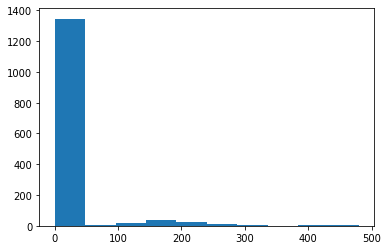

PoolArea embedding
[  0 480 512 519 555 576 648 738]
0 NaN values removed
PoolArea not normalized
mean and std
2.758904109589041 40.163545235976265
quantiles
[  0.   0.   0.   0. 738.]


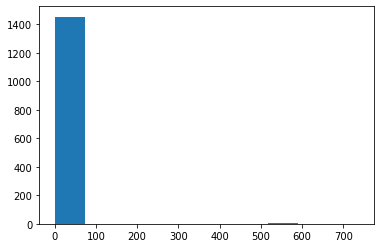

0 NaN values removed
MiscVal not normalized
mean and std
43.489041095890414 495.9530902092673
quantiles
[    0.     0.     0.     0. 15500.]


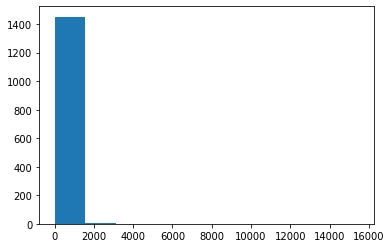

MoSold embedding
[ 1  2  3  4  5  6  7  8  9 10 11 12]
0 NaN values removed
MoSold log normalized
mean and std
1.7246834412727357 0.5426315804499567
quantiles
[0.    1.609 1.792 2.079 2.485]


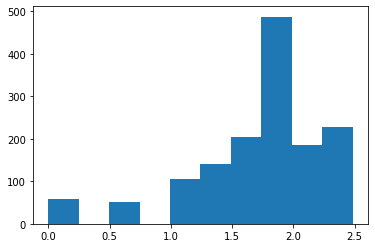

YrSold embedding
[2006 2007 2008 2009 2010]
0 NaN values removed
YrSold log normalized
mean and std
7.604802501731742 0.0006612152576911314
quantiles
[7.604 7.604 7.605 7.605 7.606]


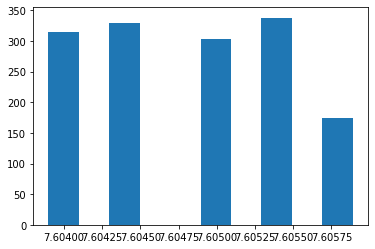

0 NaN values removed
SalePrice log normalized
mean and std
12.024050901109383 0.39931504624370256
quantiles
[10.46  11.775 12.002 12.274 13.534]


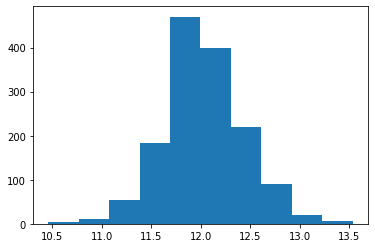

In [10]:
featurizations = defaultdict(list)
for ncol in numerical_cols:
    arr = data.loc[:, ncol].values
    n_uniques = len(np.unique(arr))
    hist = False
    embed = False
    if n_uniques <= 15:
        print(ncol, "embedding")
        print(np.unique(arr))
        embed = True
    n_nans = np.isnan(arr).sum()
    print(f"{n_nans} NaN values removed")
    arr = arr[~np.isnan(arr)]
    if arr.min() > 0:
        print(ncol, "log normalized")
        arr = np.log(arr)
        hist = True
    else:
        print(ncol, "not normalized")
        hist = True
    if hist:
        print('mean and std')
        print(arr.mean(), arr.std())
        print('quantiles')
        print(np.quantile(arr, [0.0, 0.25, 0.5, 0.75, 1.0]))
        plt.figure()
        plt.hist(arr)
        plt.show()
        plt.close()
    if embed:
        cat = "embed double check"
    elif n_nans > 0:
        cat = "nan problem"
    elif arr.min() > 0:
        cat = "log norm"
    else:
        cat = "identity"
    featurizations[cat].append(ncol)

In [11]:
featurizations

defaultdict(list,
            {'embed double check': ['MSSubClass',
              'OverallQual',
              'OverallCond',
              'BsmtFullBath',
              'BsmtHalfBath',
              'FullBath',
              'HalfBath',
              'BedroomAbvGr',
              'KitchenAbvGr',
              'TotRmsAbvGrd',
              'Fireplaces',
              'GarageCars',
              'PoolArea',
              'MoSold',
              'YrSold'],
             'nan problem': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
             'log norm': ['LotArea',
              'YearBuilt',
              'YearRemodAdd',
              '1stFlrSF',
              'GrLivArea',
              'SalePrice'],
             'identity': ['BsmtFinSF1',
              'BsmtFinSF2',
              'BsmtUnfSF',
              'TotalBsmtSF',
              '2ndFlrSF',
              'LowQualFinSF',
              'GarageArea',
              'WoodDeckSF',
              'OpenPorchSF',
              'EnclosedPorc

In [14]:
double_check = iter(featurizations['embed double check'])

In [89]:
len(embedded) + len(scaled)

14

In [90]:
len(featurizations['embed double check'])

15

In [92]:
ncol = [x for x in featurizations['embed double check'] if x not in (embedded + scaled)][0]

In [18]:
embedded = []
scaled = []

In [88]:
from collections import Counter
ncol = next(double_check)
print(f"checking {ncol}")

StopIteration: 

In [94]:
counter = Counter([val for val in data[ncol].values])
val_counts = sorted(list(counter.items()), key=lambda x: x[0])
total_count = sum(counter.values())
for val, count in val_counts:
    print(val, int(100 * count/total_count))

0 94
1 5
2 0


In [93]:
ncol

'BsmtHalfBath'

In [95]:
embedded.append(ncol)
# scaled.append(ncol)

In [96]:
embedded, scaled

(['BsmtFullBath',
  'FullBath',
  'HalfBath',
  'KitchenAbvGr',
  'Fireplaces',
  'MoSold',
  'YrSold',
  'BsmtHalfBath'],
 ['OverallQual',
  'MSSubClass',
  'OverallCond',
  'BedroomAbvGr',
  'TotRmsAbvGrd',
  'GarageCars',
  'PoolArea'])

In [98]:
# np.save('data/toembedlist', embedded)

In [99]:
# np.save('data/toscalelist', scaled)

In [100]:
# np.save('data/tolognorm', featurizations['log norm'])

In [101]:
# np.save('data/toidentity', featurizations['identity'])

- remove the Nan problem columns
- review embedding columns with either -1, 1 scaling of vocab size
- apply the rest as precribed
- log the pool area

In [11]:
len([val for val in data.dtypes if val == 'object'])

43

In [19]:
for col in data.columns:
    datacol = data[col]
    if datacol.dtype == 'object':
        print(f"col name {col}")
        print(f"num NaN {datacol.isna().sum()}")
        print(f"unique values: {datacol.astype(str).unique()}")
        print("*" * 15)

col name MSZoning
num NaN 0
unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
***************
col name Street
num NaN 0
unique values: ['Pave' 'Grvl']
***************
col name Alley
num NaN 1369
unique values: ['nan' 'Grvl' 'Pave']
***************
col name LotShape
num NaN 0
unique values: ['Reg' 'IR1' 'IR2' 'IR3']
***************
col name LandContour
num NaN 0
unique values: ['Lvl' 'Bnk' 'Low' 'HLS']
***************
col name Utilities
num NaN 0
unique values: ['AllPub' 'NoSeWa']
***************
col name LotConfig
num NaN 0
unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
***************
col name LandSlope
num NaN 0
unique values: ['Gtl' 'Mod' 'Sev']
***************
col name Neighborhood
num NaN 0
unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
***************
col name Co

- fairly moderate vocabulary size for each non-numerical feature
- NaN values will be their own category
- some redundant cols (garage quality and condition) and will keep out some columns